## Exploratory Data Analysis on Superstore Sales

### By Apurva Acharya 
### For Statsly Analytics

#### Problem Statement- The goal of every supermarket is to make a profit. This is achieved when more goods are sold and the turnover ishigh. A major challenge to increasing sales of a supermarket lies in the ability of the manager to forecast salespatterns and know readily beforehand when to order and replenish inventories as well as plan for manpower andstaff. The amount of sales data has steadily been on the increase in recent years and the ability to leverage this goldof data separates high-performing supermarkets from the others. One of the most valuable assets a supermarketcan have is data generated by customers as they interact with various supermarkets.
#### Within these data, lies important patterns and variables that can be used by superstores to plan business strategies.Find out some interesting insights from the data provided to you and make a dashboard using any BI tool (such asTableau, Power BI, etc ). Make a summary report based on your analysis.

EDA(Exploratory Data Analysis ) is used to analyze and investigate datasets and summarize their main characteristics, ofthen employing data visualization methods. It helps discover patterns , spot anomalies test a hypothesis or check an assumption.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sst=pd.read_excel("D:\Superstore.xlsx")
sst.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
sst.shape

(9994, 21)

The dataset has 9994 rows and 21 columns.

In [4]:
sst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
sst.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
sst.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
sst.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [8]:
dup=sst.duplicated().sum()
print(dup)

0


## Univariate Analysis

In [9]:
len(sst['Segment'])

9994

In [10]:
sst['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:ylabel='Segment'>

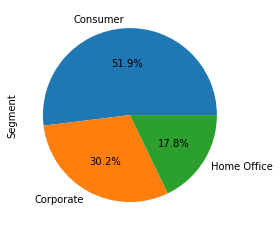

In [11]:
sst['Segment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

The consumer segment has the highest sales percentage.

In [12]:
sst['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

Text(0, 0.5, 'Event')

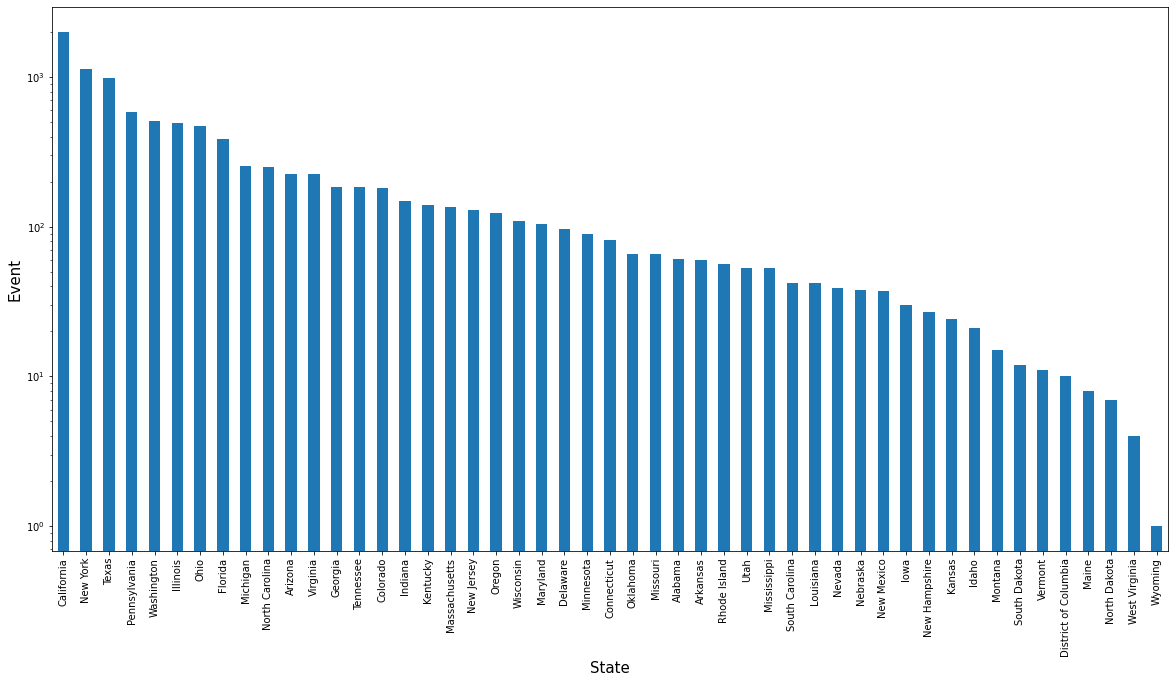

In [13]:
plt.figure(figsize=(20,10))
sst['State'].value_counts().plot(kind='bar',logy=True)
plt.xlabel('State',fontsize=15)
plt.ylabel('Event',fontsize=15)

The sales in California are the highest, while the lowest are in Montana.

<AxesSubplot:>

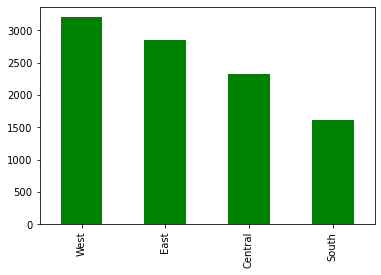

In [14]:
plt.figure(figsize=(6,4))
sst['Region'].value_counts().plot(kind='bar',color='green')

The West Region has higher sales compared to others.

<AxesSubplot:>

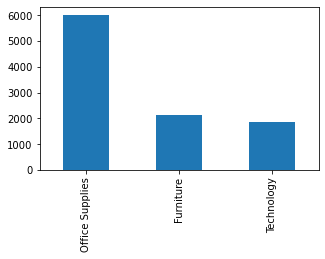

In [15]:
plt.figure(figsize=(5,3))
sst['Category'].value_counts().plot(kind='bar')

Office supplies sales are higher compared to other categories.

Text(0, 0.5, 'Sales')

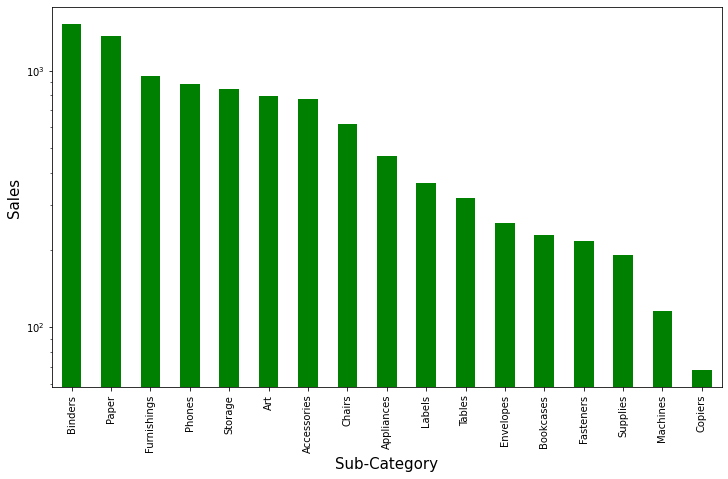

In [16]:
plt.figure(figsize=(12,7))
sst['Sub-Category'].value_counts().plot(kind='bar',color='green',logy=True)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Sales',fontsize=15)

The highest sales are of Binders, paper, Furnishigs and phone.

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

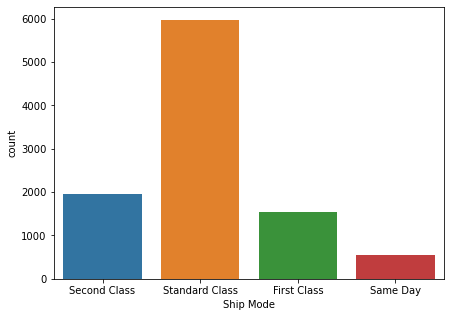

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x=sst['Ship Mode'])

People prefer Standard Class in Shipping Mode

Text(0.5, 1.0, 'Sub-Category analysis')

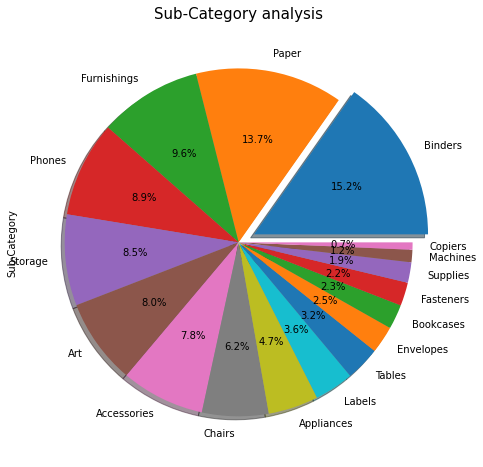

In [18]:
plt.figure(figsize=(20,8))
sst['Sub-Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Sub-Category analysis',fontsize=15)


In [19]:
Superstore=sst.drop(['Postal Code','Country'],axis=1)
Superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Correlation Matrix

<AxesSubplot:>

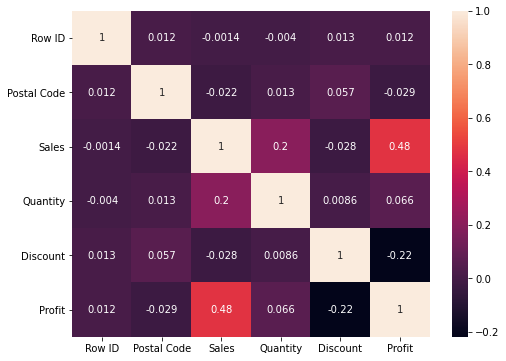

In [20]:
plt.figure(figsize=(8,6))
corr=sst.corr()
sns.heatmap(corr, annot=True)

There is an obvious high correlation between Sales and Profit. Discount and profit have a negative correlation coefficient.

## Bivariate Analysis

Text(0.5, 1.0, 'Discount vs sales')

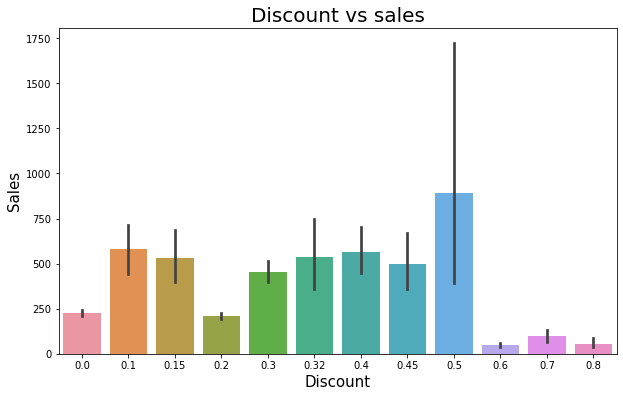

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Discount', y = 'Sales', data = sst)
plt.xlabel('Discount',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Discount vs sales',fontsize=20)

Text(0.5, 0, 'Categories')

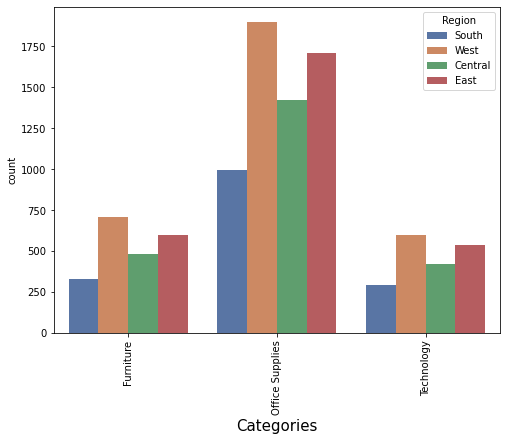

In [22]:
plt.figure(figsize=(8,6))

sns.countplot(x = 'Category',hue = 'Region', data = sst, palette='deep')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Categories',fontsize=15)

Text(0.5, 0, 'Sub-Category')

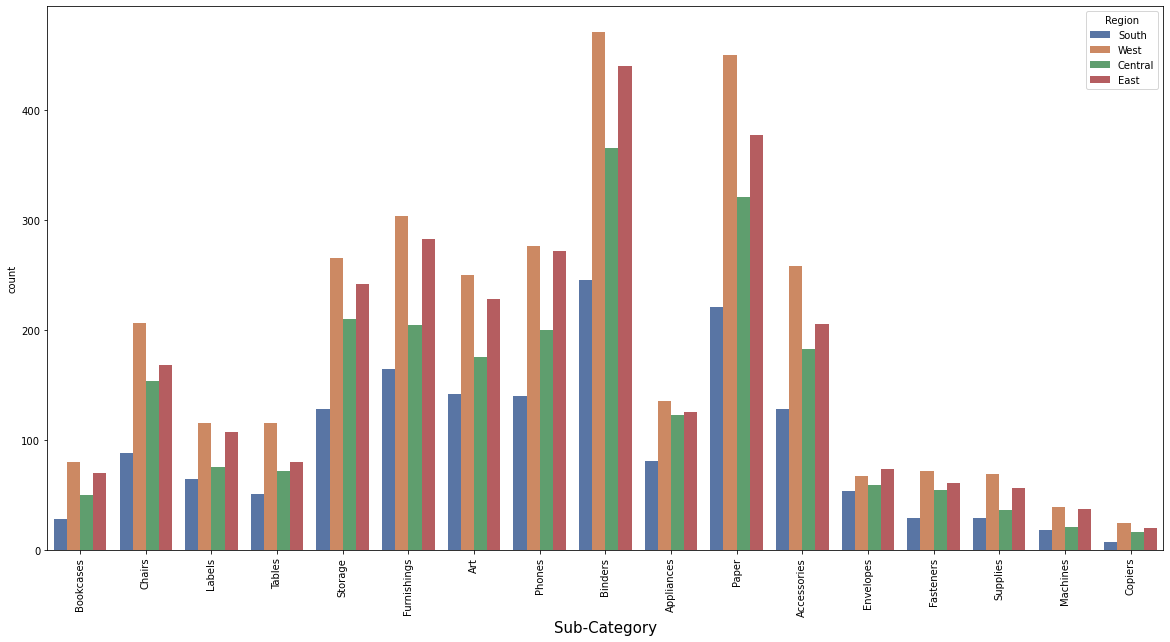

In [23]:
plt.figure(figsize=(20,10))

sns.countplot(x = 'Sub-Category',hue = 'Region', data = sst, palette='deep')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Sub-Category',fontsize=15)

From the above figures, we see that people in the West Region shop more than others.

Text(0.5, 1.0, 'Statewise Profit margin')

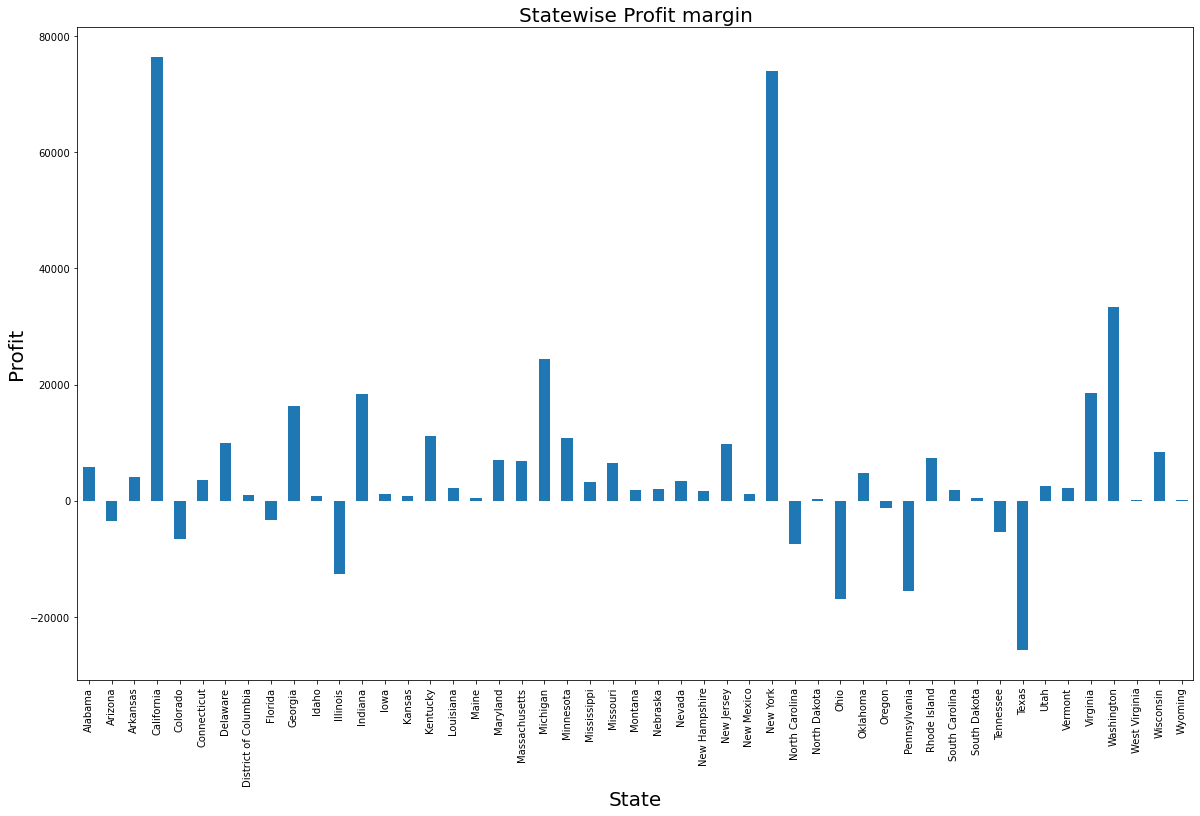

In [24]:
sst.groupby('State')['Profit'].sum().plot.bar(figsize=(20,12))
plt.xlabel('State',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.title('Statewise Profit margin',fontsize=20)

States like California and New York show high profit margin, while some like Texas and Ohio have suffered losses.

Text(0.5, 1.0, 'Statewise Sales')

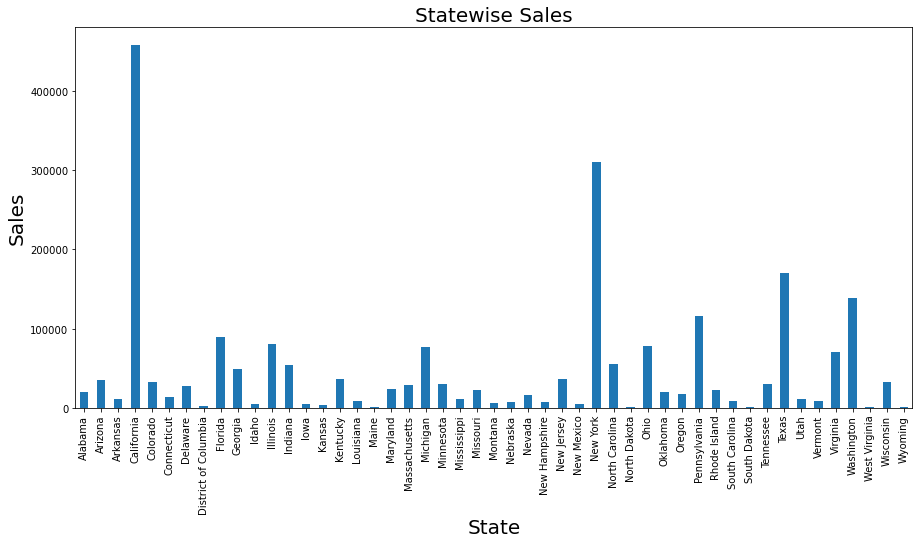

In [25]:
sst.groupby('State')['Sales'].sum().plot.bar(figsize=(15,7))
plt.xlabel('State',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.title('Statewise Sales',fontsize=20)

Least Sales are seen in Wyoming, North Dakota, West Virginia, South Dakota.

Text(0.5, 1.0, 'Categorywise profit and sales')

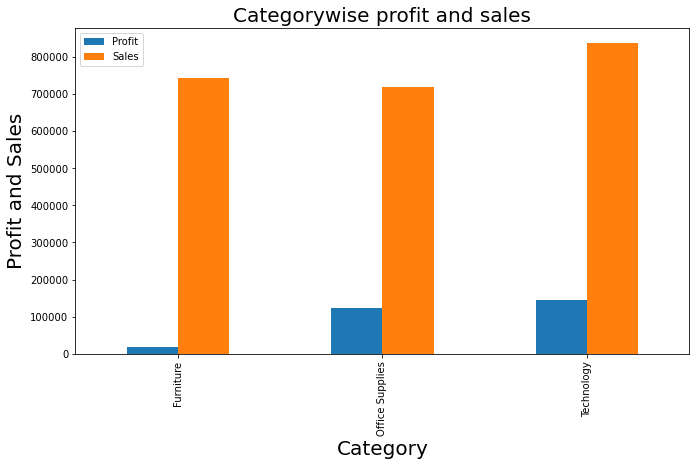

In [26]:
sst.groupby('Category')['Profit','Sales'].sum().plot.bar(figsize=(11,6))
plt.xlabel('Category',fontsize=20)
plt.ylabel('Profit and Sales',fontsize=20)
plt.title('Categorywise profit and sales',fontsize=20)

Technological Sales bring more profit while Furniture brings the least.

Text(0.5, 1.0, 'Discount vs Category')

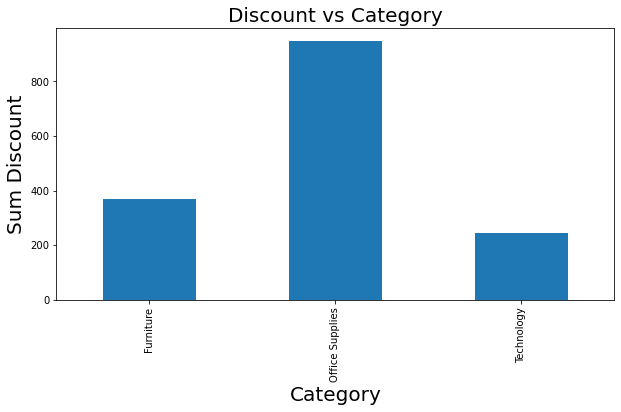

In [27]:
sst.groupby('Category')['Discount'].sum().plot.bar(figsize=(10,5))
plt.xlabel('Category',fontsize=20)
plt.ylabel('Sum Discount',fontsize=20)
plt.title('Discount vs Category',fontsize=20)

Text(0.5, 0, 'Categorywise Discount')

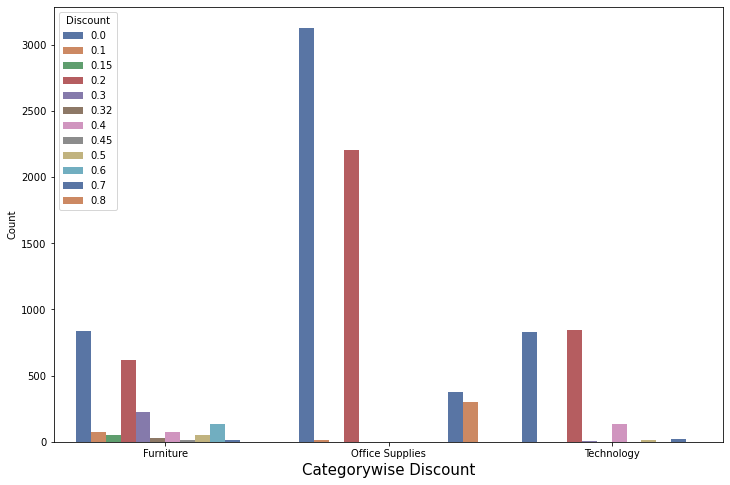

In [28]:
plt.figure(figsize=(12,8))

sns.countplot(x =sst['Category'],hue = sst['Discount'], palette='deep')
plt.xlabel('Category',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Categorywise Discount',fontsize=15)

Text(0.5, 0, 'Sub-Categorywise Profit and Sales')

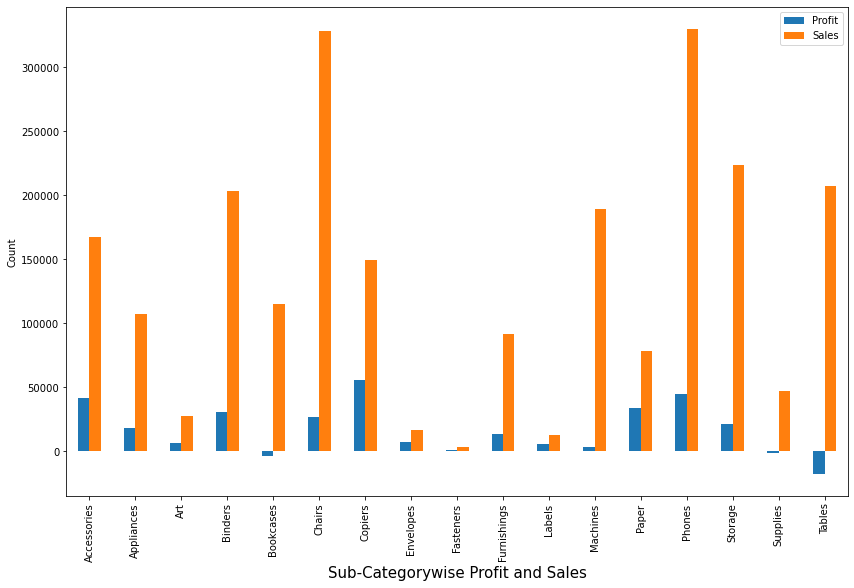

In [29]:
sst.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar(figsize=(14,9))
plt.xlabel('Sub-Category',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Sub-Categorywise Profit and Sales',fontsize=15)

Table sales are causing loss due to discount, while Copiers and Phones are making a good profit.

Text(0.5, 0, 'Impact of Discount on profit')

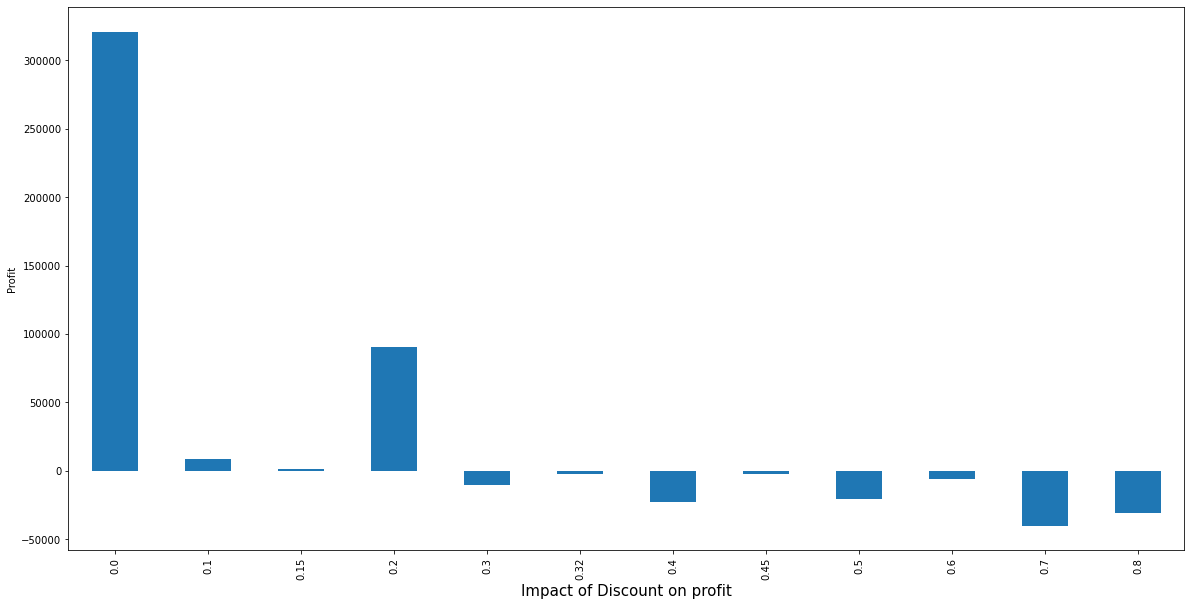

In [30]:
# Impact of Discount on profit
sst.groupby('Discount')['Profit'].sum().plot.bar(figsize=(20,10))
plt.xlabel('Discounts',fontsize=10)
plt.ylabel('Profit',fontsize=10)
plt.xlabel('Impact of Discount on profit',fontsize=15)

Discounts upto 20% help make profits, while more cause losses.

Text(0.5, 0, 'Regionwise Profit and Sales')

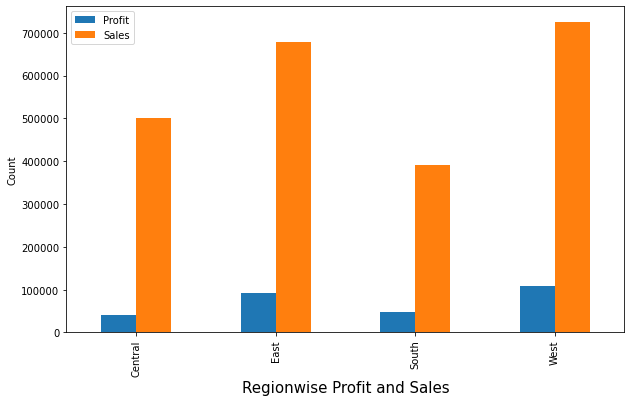

In [31]:
sst.groupby('Region')['Profit','Sales'].sum().plot.bar(figsize=(10,6))
plt.xlabel('Region',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Regionwise Profit and Sales',fontsize=15)

West region has the most sales and profits, while the central region gives the least profits. If the sales in the South are increased, it could bring more profits.

Text(0.5, 0, 'Segmentwise Profit and Sales')

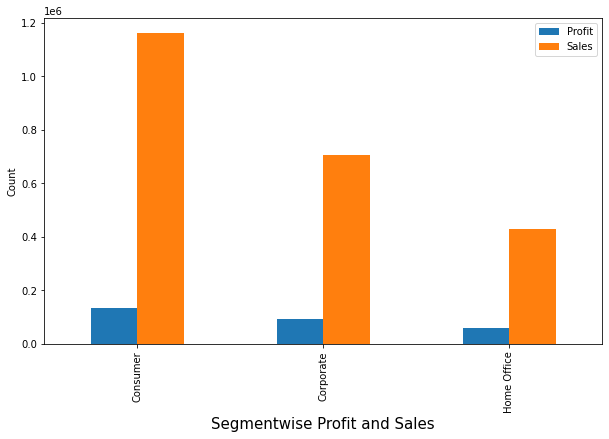

In [32]:
sst.groupby('Segment')['Profit','Sales'].sum().plot.bar(figsize=(10,6))
plt.xlabel('Segment',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Segmentwise Profit and Sales',fontsize=15)

Consumer segment has the highest sales and profit, while Home office is a poor performer.

Text(0.5, 0, 'Discount VS Sales')

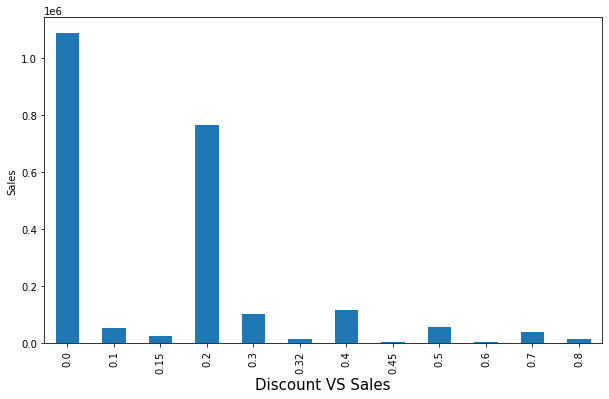

In [33]:
sst.groupby('Discount')['Sales'].sum().plot.bar(figsize=(10,6))
plt.xlabel('Discount',fontsize=10)
plt.ylabel('Sales',fontsize=10)
plt.xlabel('Discount VS Sales',fontsize=15)

With 0% and 20% doscount, Sales are the highest.

Text(0.5, 0, 'Discount and Sales VS Sub-Category')

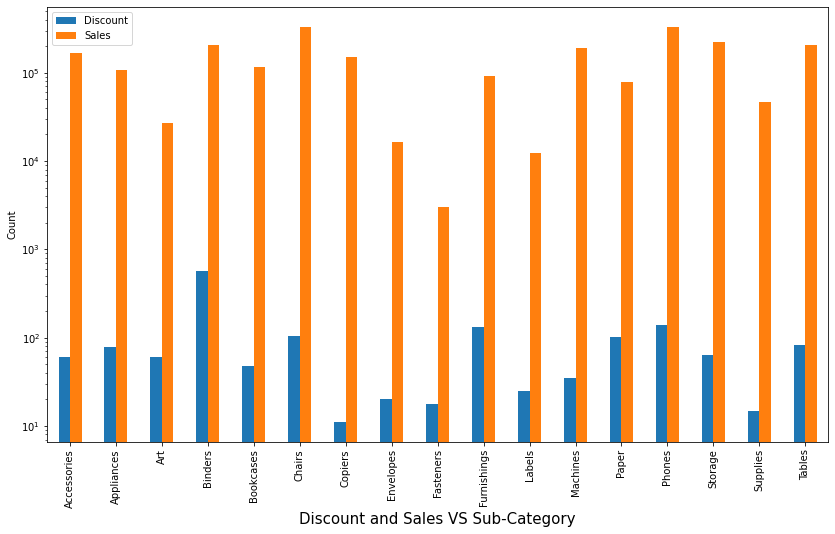

In [34]:
sst.groupby('Sub-Category')['Discount','Sales'].sum().plot.bar(figsize=(14,8),logy= True)
plt.xlabel('Sub-Category',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Discount and Sales VS Sub-Category',fontsize=15)

### Conclusion- The residents of the West Region are leading customers, in every category of products , while the south region performs poorly in sales. Taking a look at the statewise profit margins, California and New York show high profit margin, while some like Texas and Ohio have suffered losses.
### Looking at the profit percentage categorywise, we see that Technological Sales bring the highest profit, and Furniture category, even with high sales is less profitable due to discounts. Even after having the highest discounted commodities, Office Supplies Category performs well in the profit-sales ratio. Looking at the data Sub-Categorywise, we observe that Copiers and Phones are most profitable, while Table Sales are causing discount. 
### West region has the most sales and profits, while the central region gives the least profits. If the sales in the South are increased, it could bring more profits to the superstore. 
### Looking at Segmentwise profit and sales, consumer products have been the most profitable, while Home office has been the least profitable.
### Now for the correlation between discount ,sales and profits- We observe that for the products having a discount range between 0-20% are sold the highest. Inspite of less discount , sales of copiers are high.Blinders ,furnishings and appliances have a considerable discount, but still do not ensure more sale in comparison. 
### Discounts more than 30% of the commodity price have caused losses. 
### Hence we can conclude that there is no significant correlation between more discount and profit. The discount range upto 20% will bring profits.